### Principal Component Analysis on face images: Dimension Reduction

Implement PCA algorithm on face images for dimension reduction. The dataset 
contains a dataset X of face images, each 32x32 in grayscale. Each row
of X corresponds to one face image (a row vector of length 1024).
<img src ="./images/face_image_with-dimension-reduction.png">

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import warnings; warnings.simplefilter('ignore')

#### Visualizing exampl dataset for PCA

[0.5, 6.5, 2, 8]

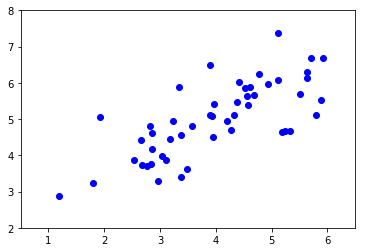

In [22]:
data = loadmat('./data/PCA_data1.mat')
X = data['X']
plt.plot(X[:,0], X[:,1], 'bo')
plt.axis([0.5, 6.5, 2,8])

#### Implementing PCA

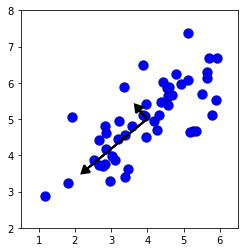

In [47]:
def featureNormalize(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X)
    X_norm = (X-mu)/sigma
    return X_norm, mu, sigma

def pca(X):
    sigma = 1/X.shape[0]*X.T.dot(X) 
    U,S,V = np.linalg.svd(sigma)
    return U, S, V

X_norm, mu, sigma = featureNormalize(X)
U,S,V = pca(X_norm)

fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=0.25)

for i in range(2):
    ax.arrow(mu[0], mu[1], 1.5 * S[i]*U[0, i], 1.5 * S[i]*U[1, i],
             head_width=0.25, head_length=0.2, fc='k', ec='k', lw=2, zorder=1000)

ax.axis([0.5, 6.5, 2, 8])
ax.set_aspect('equal')
ax.grid(False)

#### Dimension Reduction

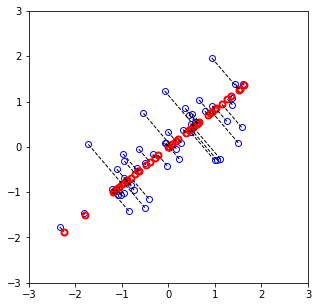

In [60]:
def projectData(X, U, K):
    Z = np.zeros((X.shape[0],K))
    for i in range(X.shape[0]):
        for j in range(K):
            x = X[i,:].T
            Z[i,j] = x.T.dot(U[:,j])
    return Z
    
def recoverData(Z, U, K):
    X_rec = np.zeros((Z.shape[0], U.shape[0]))
    for i in range(Z.shape[0]):
        for j in range(U.shape[1]):
            v = Z[i,:].T
            X_rec[i,j] = v.T.dot(U[j,:K].T)
    return X_rec

K = 1;
Z = projectData(X_norm, U, K)
X_rec  = recoverData(Z, U, K)
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(X_norm[:, 0], X_norm[:, 1],  'bo', fillstyle='none')
plt.axis([-3, 3, -3,3])
ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro',  fillstyle='none')

# Draw lines connecting the projected points to the original points
ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro', mec='r', mew=2, mfc='none')
for xnorm, xrec in zip(X_norm, X_rec):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], '--k', lw=1)

#### Face Data Visualisation

In [80]:
def  displayData(sel,x):
    fig, axs = plt.subplots(x, x,figsize=(6,6))
    for i in range(x):
            for j in range(x):
                axs[i,j].imshow(sel[i*x+j].reshape(32,32).T, cmap='gray')
                axs[i,j].axis('off')

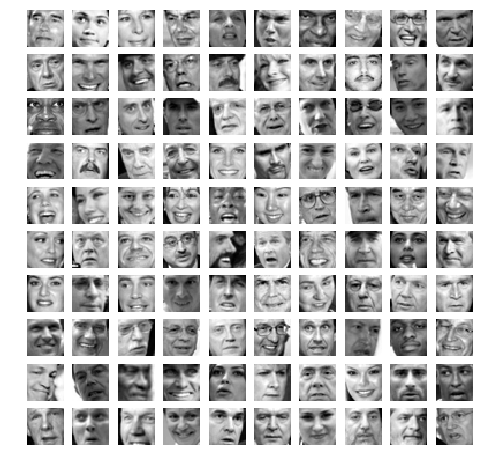

In [65]:
data = loadmat('./data/face_images.mat')
X = data['X']
X_norm, mu, sigma = featureNormalize(X)
U,S,V = pca(X_norm)
visu = data['X'] 
np.random.shuffle(visu)
sel = X[:100]

displayData(sel,10)

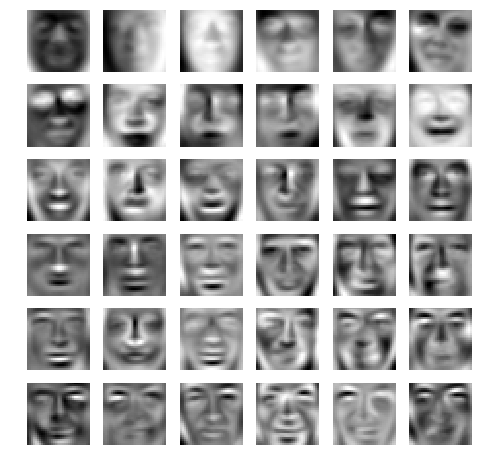

In [66]:
U,S,V = pca(X_norm)
displayData(U[:,:36].T, 6)

In [ ]:
K = 100;
Z = projectData(X_norm, U, K)
X_rec  = recoverData(Z, U, K)

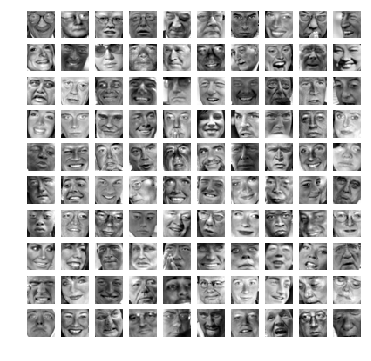

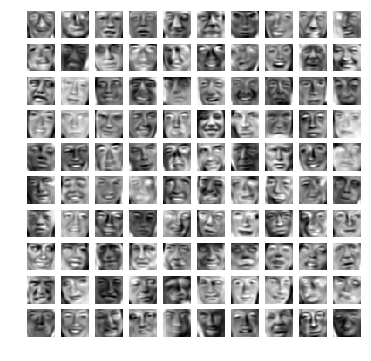

In [84]:
# Display normalized data
displayData(X_norm[:100,:], 10)
# Display reconstructed data from only k eigenfaces
displayData(X_rec[:100,:],10)